In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import os
from ipywidgets import interact

In [2]:
def load_scan(path):
    slices = [pydicom.dcmread(path + '/' + s) for s in               
              os.listdir(path)]
    slices = [s for s in slices if 'SliceLocation' in s]
    slices.sort(key = lambda x: int(x.InstanceNumber))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
    for s in slices:
        s.SliceThickness = slice_thickness
    return slices
def get_pixels_hu(scans):
    image = np.stack([s.pixel_array for s in scans])
    image = image.astype(np.int16)
    image[image == -2000] = 0
    intercept = scans[0].RescaleIntercept
    slope = scans[0].RescaleSlope
    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)
    image += np.int16(intercept)
    return np.array(image, dtype=np.int16)

In [4]:
path = r'C:\Users\sbjtlg\Desktop\CT数据\1-P4P100S300I00003 Gated 0.0A-29193'
patient_dicom = load_scan(path)
patient_pixels = get_pixels_hu(patient_dicom)

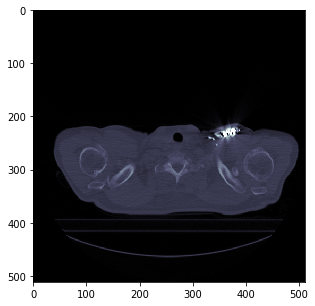

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(patient_pixels[11], cmap=plt.cm.bone)

In [7]:
plt.figure(1)
def dicom_animation(x):
    plt.figure(figsize=(5,5))
    plt.imshow(patient_pixels[x], cmap=plt.cm.bone)
    return x

<Figure size 432x288 with 0 Axes>

In [8]:
interact(dicom_animation, x=(0, len(patient_pixels)-1))

interactive(children=(IntSlider(value=70, description='x', max=141), Output()), _dom_classes=('widget-interact…

<function __main__.dicom_animation(x)>